In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from glob import glob
from os import path
sns.set()

In [2]:
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

548
2 2.8836010563982666 3.3882194048624745 -7.513525740135533
548
4 2.772328174897354 3.0741042824968248 -8.447320418636771
548
8 2.715470139997719 2.895900418349732 -5.417509175660627
548
16 2.7237646840784673 2.829639364993306 -3.051309602226867
553
2 2.682116544699367 3.3336042196033286 -8.493789863863384
553
4 2.6731729628164556 3.1323587254905854 -6.439724707362857
553
8 2.5890411321767632 2.8985734992420853 -6.436207324265678
553
16 2.544632261528029 2.774251942493889 -5.518517208202397
549
2 2.7391644253756833 3.2640556627842656 -9.403716510403083
549
4 2.7077143101092895 3.0735302238723787 -7.7838241428360995
549
8 2.6068704462659382 2.860258170906331 -6.093011641702656
549
16 2.580228433800091 2.7461896399618193 -4.443074849591923
549
2 2.8754455899931695 3.3600456219007717 -8.0873891645638
549
4 2.7659416268214936 3.0778600344261724 -5.2753051816232075
549
8 2.7171384050546448 2.884035824400349 -3.9196356081503394
549
16 2.692231614298725 2.7770473648768093 -2.15366394569759

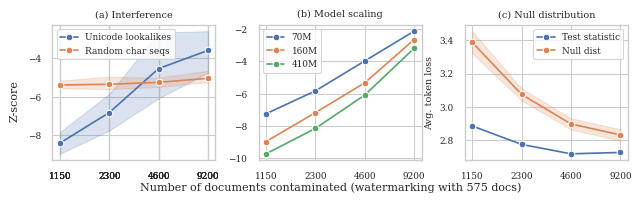

In [8]:
#
# graph 1
# 
fig, axs = plt.subplots(1, 3, figsize=(6.29,1.8), sharey=False)
fig.tight_layout()

control_idx = 575

x, y, ts, null = [], [], [], []
for i in range(1,6):        
    d = './scores/interference_decay/sample_chars_70M_%d/' % i 
    fracs = [2, 4, 8, 16]
    for f in fracs:
        input_fn = path.join(d, 'scores:%d.csv' % (f,))
        try:
            df = pd.read_csv(input_fn, header=None)
            df.columns = ['group', 'watermark', 'used?', 'loss']
        except:
            continue

        ts_len = len(df[df['used?'] == 0])
        test_statistic = df[df['used?'] == 0]['loss'].mean()
        print(ts_len)

        samples = []
        for i in range(1, 200):
            assert(ts_len == len(df.iloc[range(i,len(df),201)]))
            samples.append(df.iloc[range(i,len(df),201)]['loss'].mean())
        z_score = (test_statistic - np.mean(samples)) / np.std(samples)
        x.append(control_idx*f), y.append(z_score)
        ts.append(test_statistic), null.append(np.mean(samples))
        print(f, test_statistic, np.mean(samples), z_score)
sns.lineplot(ax=axs[0], x=x, y=y, label='Unicode lookalikes', ci=95, marker='o')


x, y, ts, null = [], [], [], []
for i in range(1,6):
    d = './scores/interference_decay/random_char_seqs_70M_%d/' % i 
    fracs = [2, 4, 8, 16]
    for f in fracs:
        input_fn = path.join(d, 'scores:%d.csv' % (f,))
        try:
            df = pd.read_csv(input_fn, header=None)
            df.columns = ['group', 'watermark', 'used?', 'loss']
        except:
            continue

        ts_len = len(df[df['used?'] == i*100])
        test_statistic = df[df['used?'] == i*100]['loss'].mean()
        print(ts_len)

        samples = []
        samples.extend(df.iloc[1:]['loss'].tolist())
        z_score = (test_statistic - np.mean(samples)) / np.std(samples)
        x.append(control_idx*f), y.append(z_score)
        ts.append(test_statistic), null.append(np.mean(samples))
        print(f, test_statistic, np.mean(samples), z_score)
sns.lineplot(ax=axs[0], x=x, y=y, label='Random char seqs', ci=95, marker='o')
axs[0].set_xscale('log')
axs[0].minorticks_off()
axs[0].xaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[0].xaxis.set_major_formatter(mticker.ScalarFormatter())
axs[0].set_xticks(ticks=x, labels=x)
axs[0].set_title('(a) Interference')

#
# graph 2
#
for name in ['70M', '160M', '410M']:
    d = './scores/interference_scaling/%s' % name
    fracs = [2, 4, 8, 16]
    x, y, ts, null = [], [], [], []
    for f in fracs:
        input_fn = path.join(d, 'scores:%.1f.csv' % (f/10))
        try:
            df = pd.read_csv(input_fn, header=None)
            df.columns = ['group', 'watermark', 'used?', 'loss']
        except:
            continue

        ts_len = len(df[df['used?'] == 0])
        test_statistic = df[df['used?'] == 0]['loss'].mean()
        print(ts_len)

        samples = []
        for i in range(1, 200):
            assert(ts_len == len(df.iloc[range(i,len(df),201)]))
            samples.append(df.iloc[range(i,len(df),201)]['loss'].mean())
        z_score = (test_statistic - np.mean(samples)) / np.std(samples)
        x.append(control_idx*f), y.append(z_score)
        ts.append(test_statistic), null.append(np.mean(samples))
        print(f, test_statistic, np.mean(samples), z_score)
    sns.lineplot(ax=axs[1], x=x, y=y, label=name, marker='o')
axs[1].set_xscale('log')
axs[1].minorticks_off()
axs[1].xaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[1].xaxis.set_major_formatter(mticker.ScalarFormatter())
axs[1].set_xticks(ticks=x, labels=x)
axs[1].set_title('(b) Model scaling')
    
#
# graph 3
# 
d = './scores/interference_decay/sample_chars_70M_1/'
fracs = [2, 4, 8, 16]
x, x_, ts, null = [], [], [], []
for f in fracs:
    input_fn = path.join(d, 'scores:%d.csv' % f)
    print(input_fn)
    df = pd.read_csv(input_fn, header=None)
    df.columns = ['group', 'watermark', 'used?', 'loss']

    ts_len = len(df[df['used?'] == 0])
    test_statistic = df[df['used?'] == 0]['loss'].mean()
    print(ts_len)

    samples = []
    for i in range(1, 200):
        assert(ts_len == len(df.iloc[range(i,len(df),201)]))
        samples.append(df.iloc[range(i,len(df),201)]['loss'].mean())
    z_score = (test_statistic - np.mean(samples)) / np.std(samples)
    x.append(control_idx*f)
    ts.append(test_statistic)

    x_.extend([control_idx*f] * len(samples))
    null.extend(samples)
    print(f, test_statistic, np.mean(samples), z_score)
sns.lineplot(ax=axs[2], x=x, y=ts, label='Test statistic', marker='o')
sns.lineplot(ax=axs[2], x=x_, y=null, label='Null dist', ci='sd', marker='o')
axs[2].set_ylabel('Avg. token loss')
axs[2].set_xscale('log')
axs[2].minorticks_off()
axs[2].xaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[2].xaxis.set_major_formatter(mticker.ScalarFormatter())
axs[2].set_xticks(ticks=x, labels=x)
axs[2].set_title('(c) Null distribution')

fig.text(0.5, -0.00, 'Number of documents contaminated (watermarking with 575 docs)', ha='center', size=8)
fig.text(-0.01, 0.5, 'Z-score', va='center', rotation='vertical', size=8)
plt.savefig('interference_properties.pdf', bbox_inches='tight')